# Weather forecast with Time-Series
Requirements:
- 3 ablation studies
- at least 1 dataset
- at least 3 models, all trained on the chose set(s)
- analyze seasonality

# Mount Drive

In [1]:
import os
from google.colab import drive
root = "/content/drive"
drive.mount(root, force_remount=True)
DATA_DIR="/content/drive/MyDrive/Work/IA2/Project"
%cd {DATA_DIR}

Mounted at /content/drive
/content/drive/MyDrive/Work/IA2/Project


# Install requirements

In [2]:
%pip install torch torchvision torchaudio
%pip install pandas matplotlib keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 124.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# Loading the datasets

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from zipfile import ZipFile

# Kaggle Weather Time-Series dataset
zip_file = ZipFile('kaggle_weather_dataset.zip')
zip_file.extractall()
weather_data = pd.read_csv('Weather_Data_1980_2024(hourly).csv')
weather_data.head()
weather_data = weather_data[weather_data['time'] <= '2023-12-31']
weather_data['time'] = pd.to_datetime(weather_data['time'])

missing_values = weather_data.isnull().sum()
summary_statistics = weather_data.describe()
summary_statistics.transpose()

,count,mean,min,25%,50%,75%,max,std
time,385680,2001-12-30 23:30:00.000000640,1980-01-01 00:00:00,1990-12-31 11:45:00,2001-12-30 23:30:00,2012-12-30 11:15:00,2023-12-30 23:00:00,NaN
temperature,385680.0,24.108211,7.1,21.5,23.4,27.0,41.7,4.971672
relative_humidity,385680.0,64.14294,6.0,42.0,67.0,89.0,100.0,25.781917
dew_point,385680.0,15.273234,-11.8,10.3,16.1,21.1,24.8,6.095428
precipitation (mm),385680.0,0.115513,0.0,0.0,0.0,0.0,29.5,0.576084
rain (mm),385680.0,0.115513,0.0,0.0,0.0,0.0,29.5,0.576084
snowfall (cm),385680.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pressure_msl (hPa),385680.0,1010.360614,991.1,1007.3,1010.5,1013.6,1024.1,4.181709
surface_pressure (hPa),385680.0,945.265651,927.0,942.7,945.6,948.0,957.3,3.722255
cloud_cover (%),385680.0,35.390764,0.0,0.0,17.0,75.0,100.0,39.520239


# Visualize data

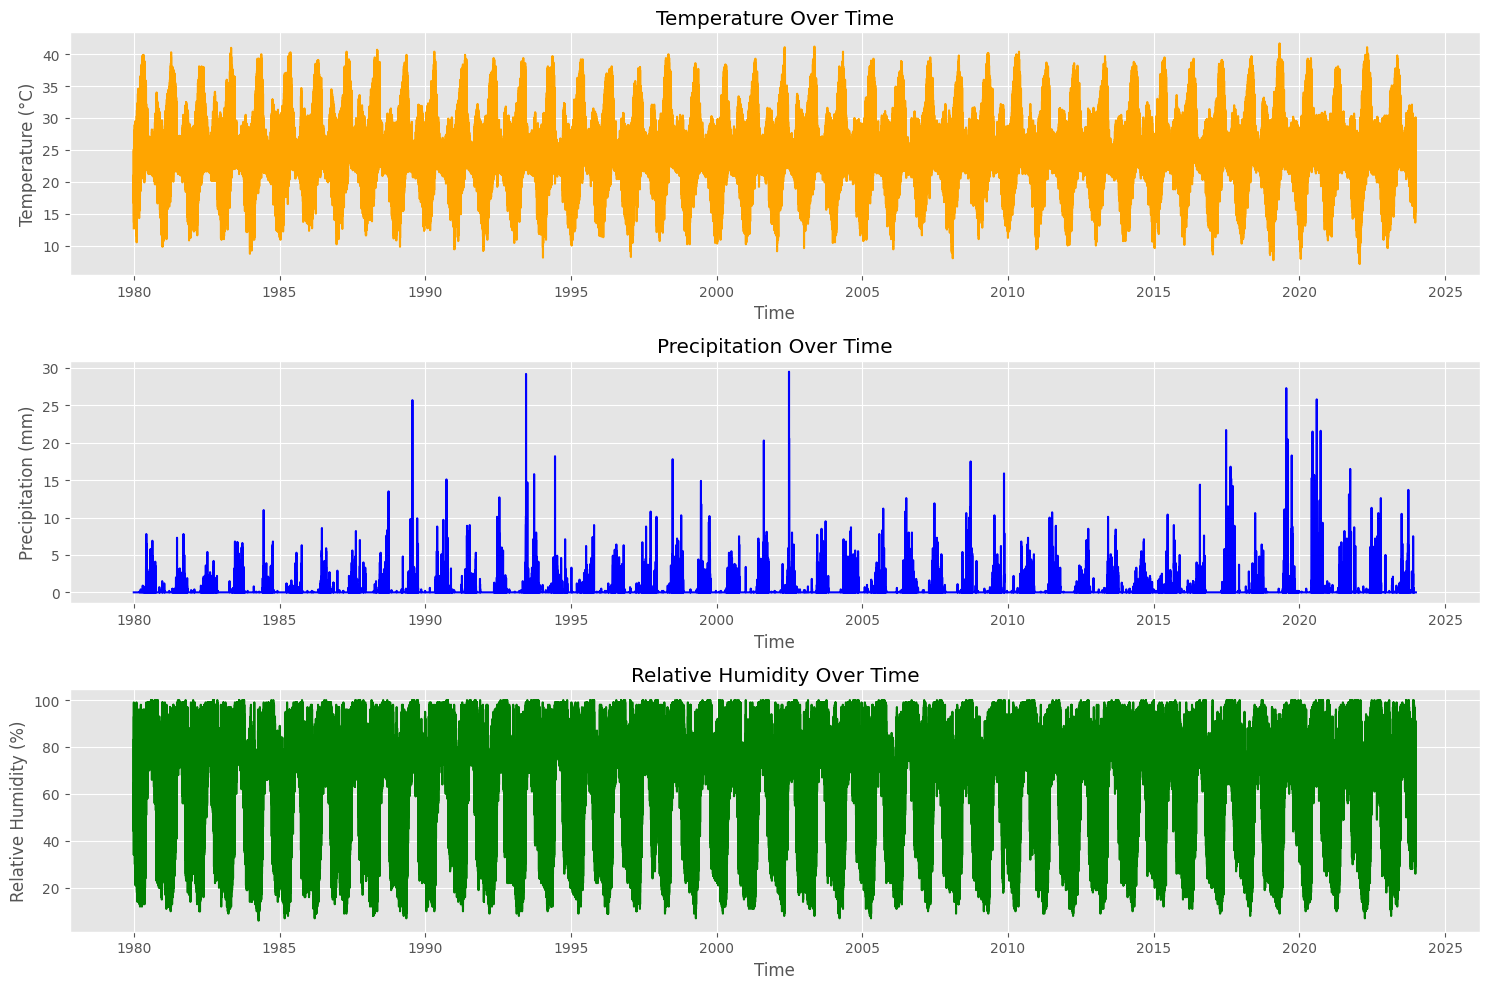

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(15, 10))

# Plot temperature over time
plt.subplot(3, 1, 1)
plt.plot(weather_data['time'], weather_data['temperature'], color='orange')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')

# Plot precipitation over time
plt.subplot(3, 1, 2)
plt.plot(weather_data['time'], weather_data['precipitation (mm)'], color='blue')
plt.title('Precipitation Over Time')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')

# Plot relative humidity over time
plt.subplot(3, 1, 3)
plt.plot(weather_data['time'], weather_data['relative_humidity'], color='green')
plt.title('Relative Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

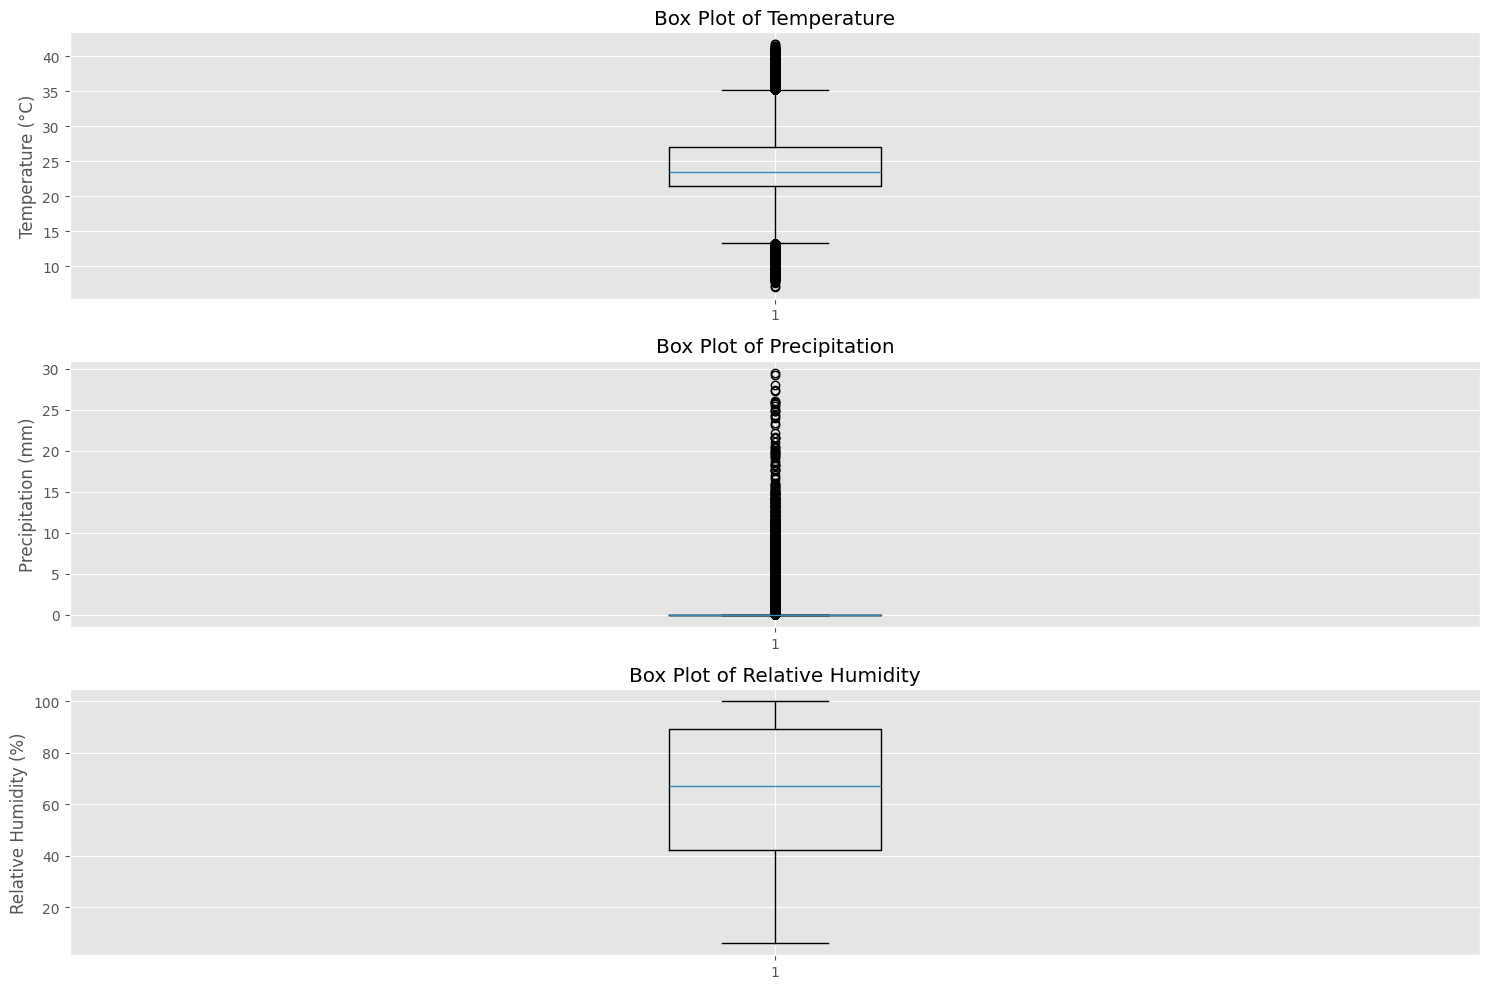

In [6]:
plt.figure(figsize=(15, 10))
#boxplots to see if there the seasonal outliers
plt.subplot(3, 1, 1)
plt.boxplot(weather_data['temperature'])
plt.title('Box Plot of Temperature')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 1, 2)
plt.boxplot(weather_data['precipitation (mm)'])
plt.title('Box Plot of Precipitation')
plt.ylabel('Precipitation (mm)')

plt.subplot(3, 1, 3)
plt.boxplot(weather_data['relative_humidity'])
plt.title('Box Plot of Relative Humidity')
plt.ylabel('Relative Humidity (%)')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Monthly data analysis

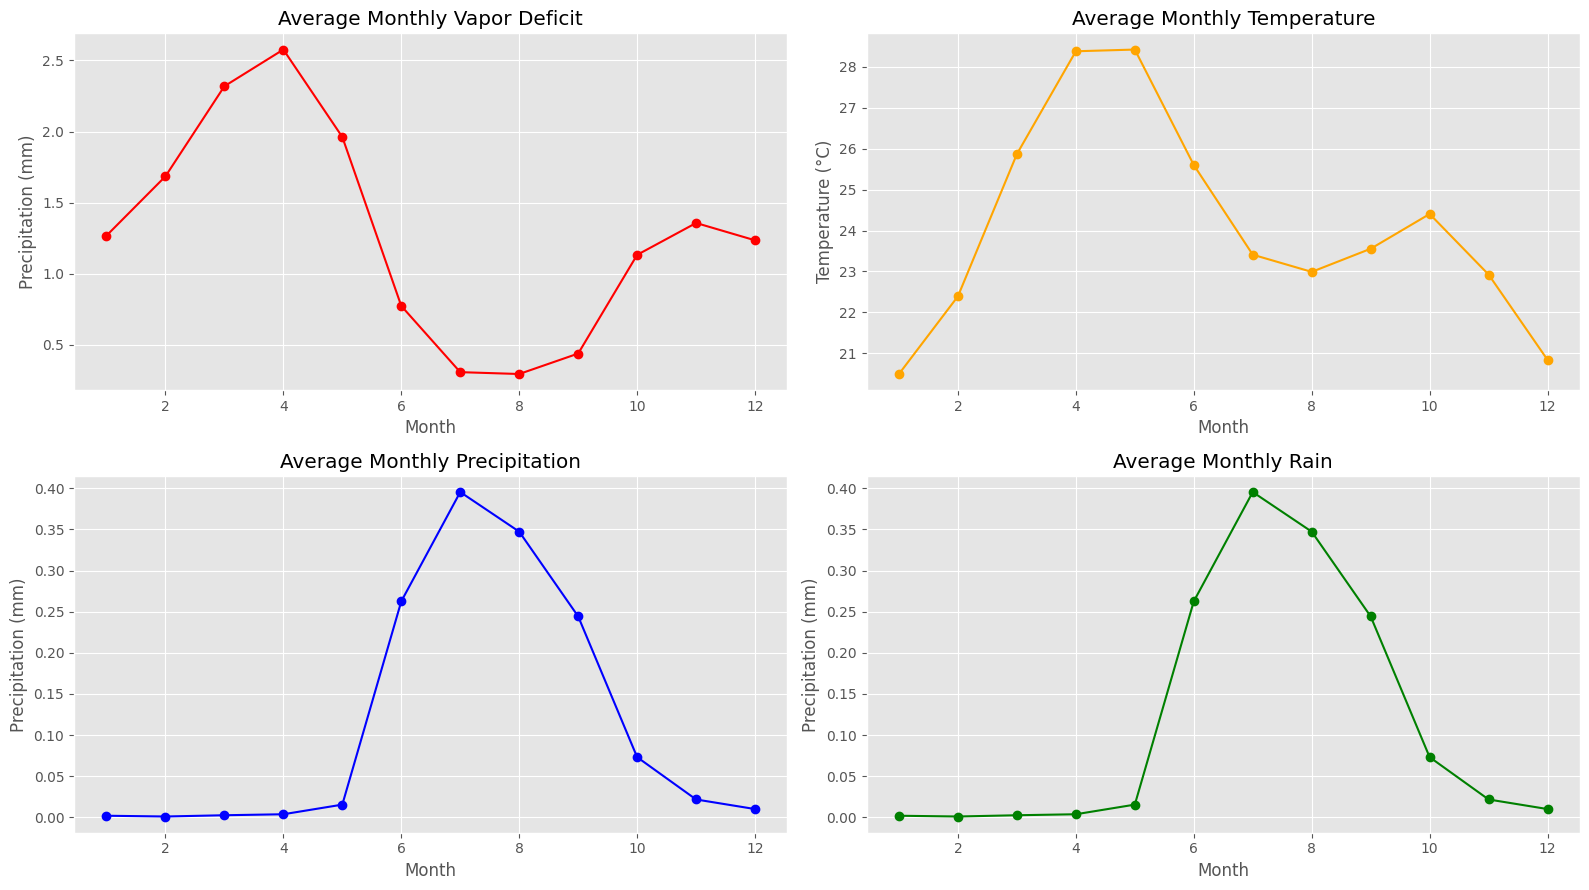

In [7]:
#New Time features
weather_data['year'] = weather_data['time'].dt.year
weather_data['month'] = weather_data['time'].dt.month
weather_data['day'] = weather_data['time'].dt.day
weather_data['hour'] = weather_data['time'].dt.hour
weather_data['day_of_week'] = weather_data['time'].dt.dayofweek

# Display the first few rows to verify the new features
weather_data[['time', 'month', 'day', 'hour', 'day_of_week']].head()

# Calculate the average monthly temperature and precipitation
monthly_avg = weather_data.groupby('month').agg({
    'temperature': 'mean',
    'precipitation (mm)': 'mean',
    'rain (mm)':'mean',
    'vapour_pressure_deficit (kPa)': 'mean'

}).reset_index()

# Set the figure size for better visibility
plt.figure(figsize=(16,9 ))

# Plot average monthly vapour deficit
plt.subplot(2, 2, 1)
plt.plot(monthly_avg['month'], monthly_avg['vapour_pressure_deficit (kPa)'], marker='o', color='red')
plt.title('Average Monthly Vapor Deficit')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
# Plot average monthly temperatue
plt.subplot(2, 2, 2)
plt.plot(monthly_avg['month'], monthly_avg['temperature'], marker='o', color='orange')
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
#Average monthly precipitation
plt.subplot(2,2,3)
plt.plot(monthly_avg['month'], monthly_avg['precipitation (mm)'], marker='o', color='blue')
plt.title('Average Monthly Precipitation')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

#avarage monthly rain
plt.subplot(2,2,4)
plt.plot(monthly_avg['month'], monthly_avg['rain (mm)'], marker='o', color='green')
plt.title('Average Monthly Rain')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Dataset analysis and pre-processing
The dataset will be pre-processed in order to extract features for training. Before that, the data is inspected for periodicity, such that the model can be trained using data sampled with different frequencies and using a varying number of features (for the ablation studies detailed later).

Total number of features: 22


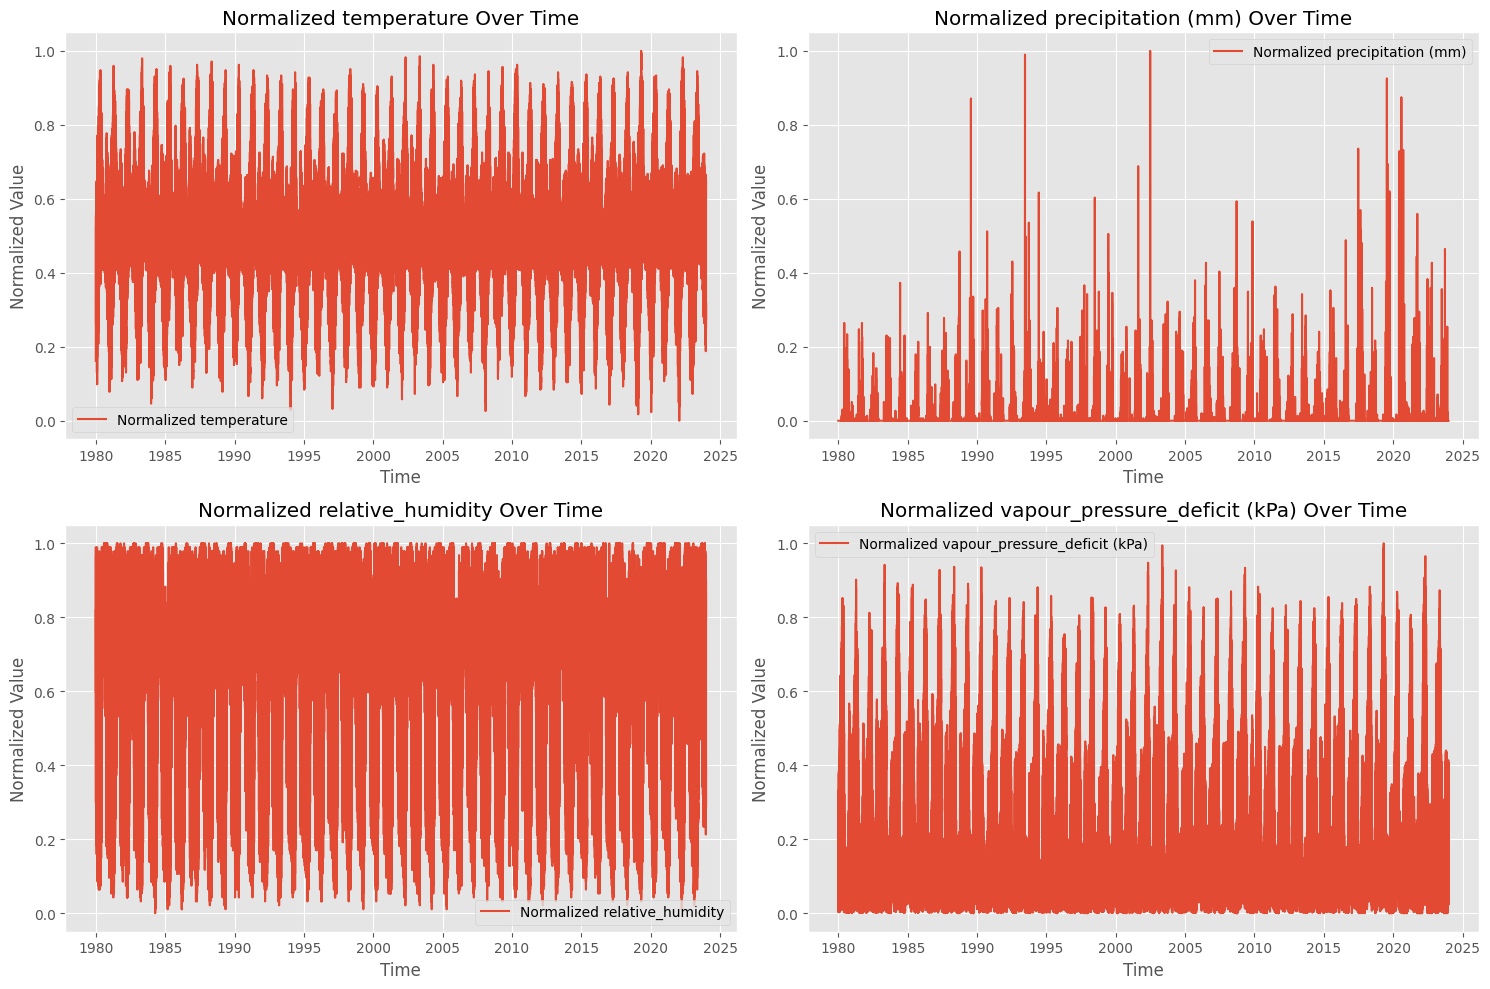

<ipython-input-8-0acfa12988ca>:43: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)


Shape of x_train: torch.Size([269960, 16, 4])
Shape of y_train: torch.Size([269960])
Shape of x_test: torch.Size([115704, 16, 4])
Shape of y_test: torch.Size([115704])


In [8]:
import torch

# Approx. ~300k points for training, the rest for val and test
train_fraction = 0.7
n = len(weather_data)
train_end = int(train_fraction * n)
sequence_length = 16
train_data_size = train_end - sequence_length

# Select a number of features
num_features = weather_data.shape[1]
print(f"Total number of features: {num_features}")
chosen_features = ['temperature', 'precipitation (mm)', 'relative_humidity', 'vapour_pressure_deficit (kPa)']
features = weather_data[chosen_features]
features.index = weather_data['time']

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=chosen_features, index=features.index)

# Visualize normalized data (optional, keep as is)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(chosen_features, 1):
    plt.subplot(2, 2, i)
    plt.plot(features_scaled[feature], label=f'Normalized {feature}')
    plt.title(f'Normalized {feature} Over Time')
    plt.xlabel('Time')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.tight_layout()
plt.show()

# Function to create sequences
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length, chosen_features.index('temperature')]
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

# Create sequences for training and testing
x_train, y_train = create_sequences(features_scaled.values[:train_end], sequence_length)
x_test, y_test = create_sequences(features_scaled.values[train_end - sequence_length:], sequence_length) # Start test data from train_end - sequence_length to get the first sequence

train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
test_dataset = torch.utils.data.TensorDataset(x_test, y_test)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Model initialization
Three models have been chosen for this project: LSTM, GRU and CNN. Pytorch offers the opportunity to finetune these models, which makes them useful for the ablation studies later.

In [9]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out


class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.linear(out[:, -1, :])
        return out


class CNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(input_size, hidden_size, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(hidden_size * (16 // 2), 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        out = self.conv1(x)
        out = self.relu(out)
        out = self.pool(out)
        out = self.flatten(out)
        out = self.linear(out)
        return out

# Baseline training and validation
Before the ablation studies, the 3 models will be trained using half the avaible parameters, using data taken every n days, and predicitions with both single and multiple outputs will be made.

### LSTM

Epoch 1/10, Training Loss: 0.0017
Epoch 1/10, Test Loss: 0.0010
Epoch 2/10, Training Loss: 0.0004
Epoch 2/10, Test Loss: 0.0006
Epoch 3/10, Training Loss: 0.0003
Epoch 3/10, Test Loss: 0.0005
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0005
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0004
Epoch 8/10, Training Loss: 0.0002
Epoch 8/10, Test Loss: 0.0005
Epoch 9/10, Training Loss: 0.0002
Epoch 9/10, Test Loss: 0.0004
Epoch 10/10, Training Loss: 0.0002
Epoch 10/10, Test Loss: 0.0004


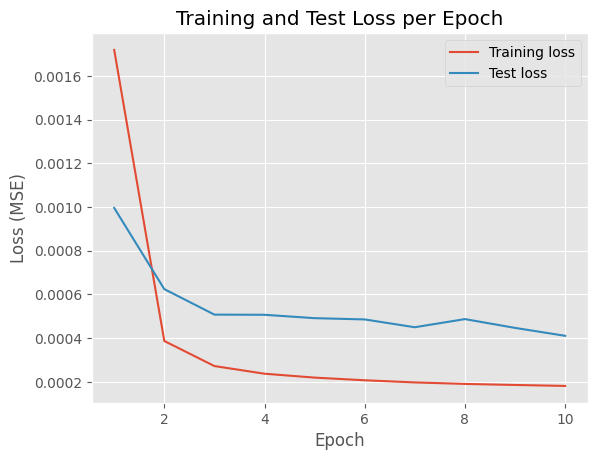

In [10]:
# View losses
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch

train_losses = []
test_losses = []

model_lstm = LSTMModel(input_size=len(chosen_features), hidden_size=64, num_layers=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_lstm.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_lstm(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_lstm.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model_lstm(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss) # Append the average test loss for the epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Test Loss per Epoch")
plt.show()

### GRU

Epoch 1/10, Training Loss: 0.0008
Epoch 1/10, Test Loss: 0.0010
Epoch 2/10, Training Loss: 0.0003
Epoch 2/10, Test Loss: 0.0006
Epoch 3/10, Training Loss: 0.0002
Epoch 3/10, Test Loss: 0.0006
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0006
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0005
Epoch 8/10, Training Loss: 0.0001
Epoch 8/10, Test Loss: 0.0005
Epoch 9/10, Training Loss: 0.0001
Epoch 9/10, Test Loss: 0.0005
Epoch 10/10, Training Loss: 0.0001
Epoch 10/10, Test Loss: 0.0005


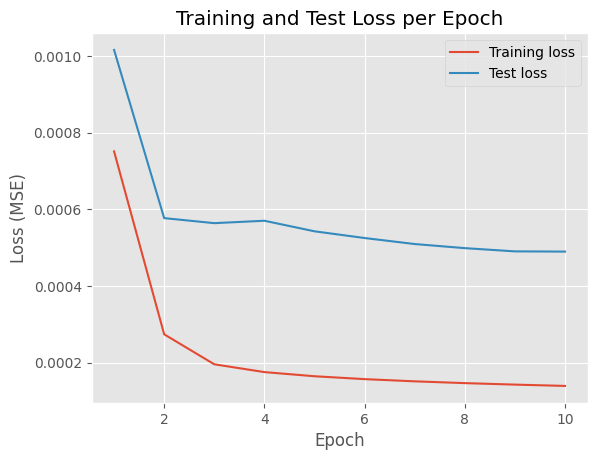

In [11]:
# View losses
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch

train_losses = []
test_losses = []

model_gru = GRUModel(input_size=len(chosen_features), hidden_size=64, num_layers=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_gru.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_gru(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_gru.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model_gru(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss) # Append the average test loss for the epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Test Loss per Epoch")
plt.show()

### CNN

Epoch 1/10, Training Loss: 0.0009
Epoch 1/10, Test Loss: 0.0006
Epoch 2/10, Training Loss: 0.0003
Epoch 2/10, Test Loss: 0.0005
Epoch 3/10, Training Loss: 0.0002
Epoch 3/10, Test Loss: 0.0005
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0005
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0005
Epoch 8/10, Training Loss: 0.0002
Epoch 8/10, Test Loss: 0.0005
Epoch 9/10, Training Loss: 0.0002
Epoch 9/10, Test Loss: 0.0005
Epoch 10/10, Training Loss: 0.0002
Epoch 10/10, Test Loss: 0.0005


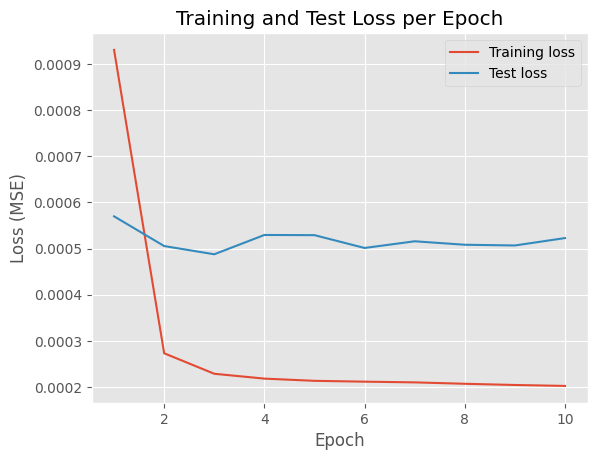

In [12]:
# View losses
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch

train_losses = []
test_losses = []

model_cnn = CNNModel(input_size=len(chosen_features), hidden_size=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

model_cnn = CNNModel(input_size=len(chosen_features), hidden_size=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_cnn.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_cnn(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")
    model_cnn.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model_cnn(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss) # Append the average test loss for the epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training and Test Loss per Epoch")
plt.show()

# Prediction results for baseline

### LSTM

<ipython-input-14-212e8aa4e1c3>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')
<ipython-input-14-212e8aa4e1c3>:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')


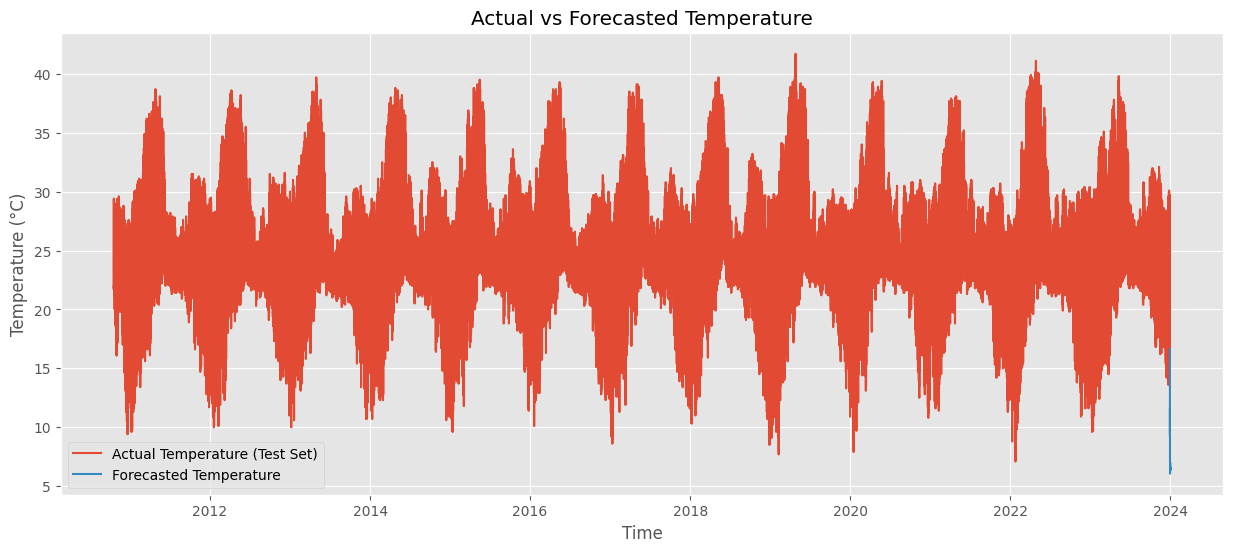

In [14]:
last_sequence_scaled = features_scaled.values[-sequence_length:]

# Convert the last sequence to a PyTorch tensor and add a batch dimension
last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)

# Set the model to evaluation mode
model_lstm.eval()

# Number of future steps to forecast
future_steps = 72 # hours

forecasted_values_scaled = []
current_sequence = last_sequence_tensor

with torch.no_grad():
    for _ in range(future_steps):
        next_step_prediction_scaled = model_lstm(current_sequence)
        forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
        new_step_tensor = next_step_prediction_scaled.unsqueeze(1) # Shape (1, 1, 1)
        padded_new_step = torch.zeros(1, 1, len(chosen_features))
        padded_new_step[:, :, chosen_features.index('temperature')] = new_step_tensor
        current_sequence = torch.cat((current_sequence[:, 1:, :], padded_new_step), dim=1)

dummy_array_forecast = np.zeros((future_steps, len(chosen_features)))
dummy_array_forecast[:, chosen_features.index('temperature')] = forecasted_values_scaled
forecasted_values_original_scale = scaler.inverse_transform(dummy_array_forecast)[:, chosen_features.index('temperature')]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')

# Get the actual test data for comparison
actual_test_time = weather_data['time'].values[train_end:]
actual_test_temp = weather_data['temperature'].values[train_end:]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')

# Plotting the actual test data and the forecasted values
plt.figure(figsize=(15, 6))
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecasted_values_original_scale, label='Forecasted Temperature')
plt.title('Actual vs Forecasted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### GRU

<ipython-input-15-662fbe02e4af>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')


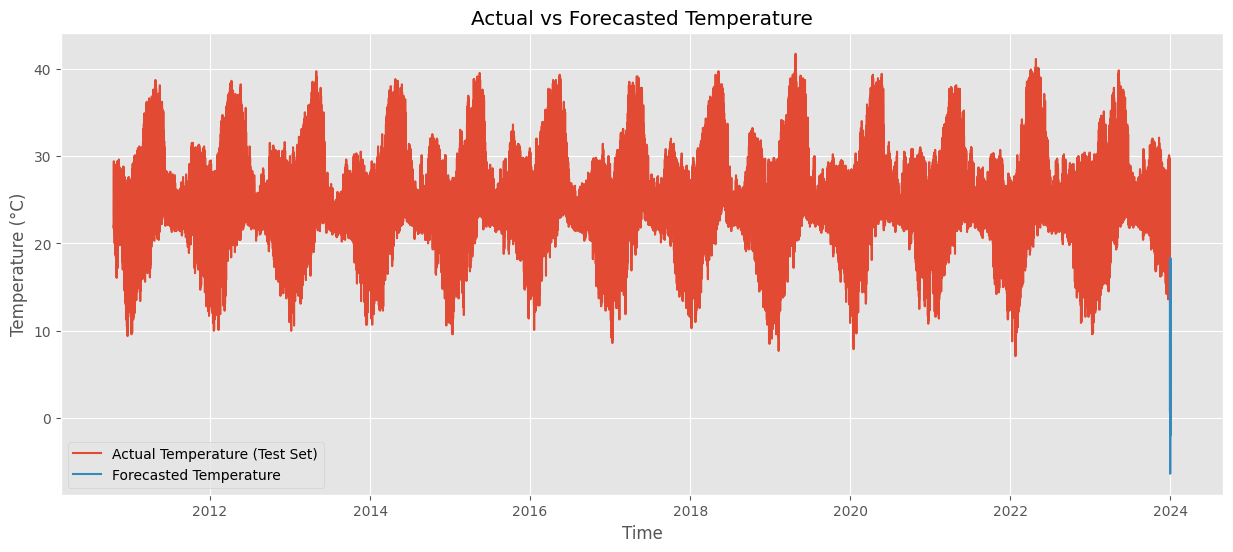

In [15]:
last_sequence_scaled = features_scaled.values[-sequence_length:]

# Convert the last sequence to a PyTorch tensor and add a batch dimension
last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)

# Set the model to evaluation mode
model_gru.eval()

# Number of future steps to forecast
future_steps = 72 # hours

forecasted_values_scaled = []
current_sequence = last_sequence_tensor

with torch.no_grad():
    for _ in range(future_steps):
        next_step_prediction_scaled = model_gru(current_sequence)
        forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
        new_step_tensor = next_step_prediction_scaled.unsqueeze(1) # Shape (1, 1, 1)
        padded_new_step = torch.zeros(1, 1, len(chosen_features))
        padded_new_step[:, :, chosen_features.index('temperature')] = new_step_tensor
        current_sequence = torch.cat((current_sequence[:, 1:, :], padded_new_step), dim=1)

dummy_array_forecast = np.zeros((future_steps, len(chosen_features)))
dummy_array_forecast[:, chosen_features.index('temperature')] = forecasted_values_scaled
forecasted_values_original_scale = scaler.inverse_transform(dummy_array_forecast)[:, chosen_features.index('temperature')]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')

# Plotting the actual test data and the forecasted values
plt.figure(figsize=(15, 6))
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecasted_values_original_scale, label='Forecasted Temperature')
plt.title('Actual vs Forecasted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### CNN

<ipython-input-16-fd3e8b662fee>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')


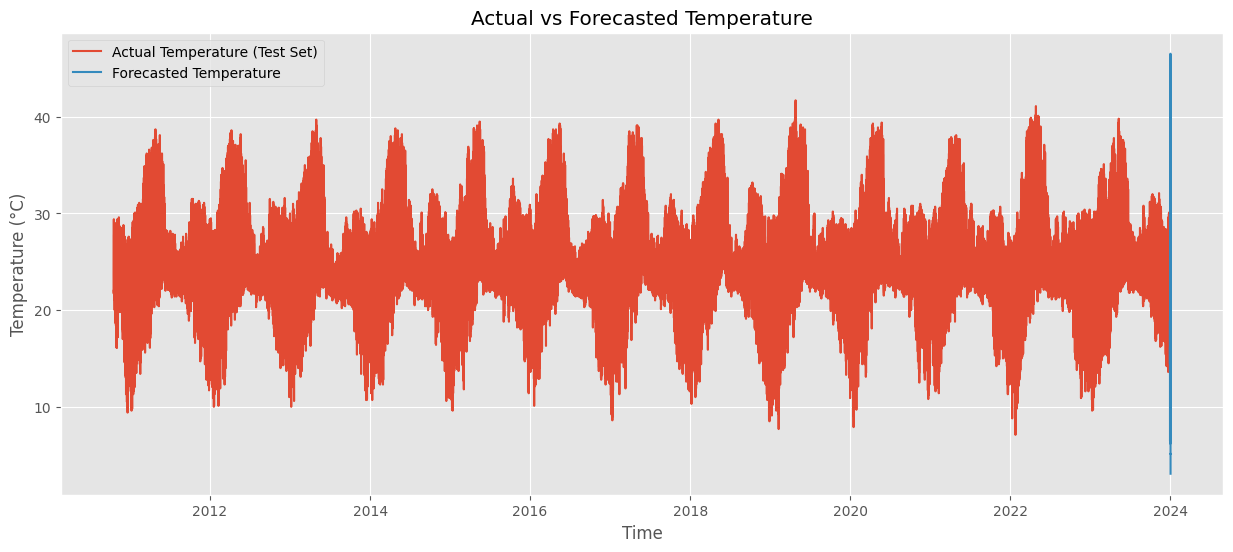

In [16]:
last_sequence_scaled = features_scaled.values[-sequence_length:]

# Convert the last sequence to a PyTorch tensor and add a batch dimension
last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)

# Set the model to evaluation mode
model_cnn.eval()

# Number of future steps to forecast
future_steps = 72 # hours

forecasted_values_scaled = []
current_sequence = last_sequence_tensor

with torch.no_grad():
    for _ in range(future_steps):
        next_step_prediction_scaled = model_cnn(current_sequence)
        forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
        new_step_tensor = next_step_prediction_scaled.unsqueeze(1) # Shape (1, 1, 1)
        padded_new_step = torch.zeros(1, 1, len(chosen_features))
        padded_new_step[:, :, chosen_features.index('temperature')] = new_step_tensor
        current_sequence = torch.cat((current_sequence[:, 1:, :], padded_new_step), dim=1)

dummy_array_forecast = np.zeros((future_steps, len(chosen_features)))
dummy_array_forecast[:, chosen_features.index('temperature')] = forecasted_values_scaled
forecasted_values_original_scale = scaler.inverse_transform(dummy_array_forecast)[:, chosen_features.index('temperature')]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')

# Plotting the actual test data and the forecasted values
plt.figure(figsize=(15, 6))
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecasted_values_original_scale, label='Forecasted Temperature')
plt.title('Actual vs Forecasted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Ablation study 1: Data augmentation
For the first ablation study, the models will be given more parameters to perform forecasting on, and then only a small amount, and results will be compared.

### Prepare data with more features

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

chosen_features_more = ['temperature', 'precipitation (mm)', 'relative_humidity', 'vapour_pressure_deficit (kPa)', 'rain (mm)', 'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)'] # Add more features
features_more = weather_data[chosen_features_more]
features_more.index = weather_data['time']
scaler_more = MinMaxScaler()
features_scaled_more = scaler_more.fit_transform(features_more)
features_scaled_more = pd.DataFrame(features_scaled_more, columns=chosen_features_more, index=features_more.index)

# Create sequences for training and testing with more features
x_train_more, y_train_more = create_sequences(features_scaled_more.values[:train_end], sequence_length)
x_test_more, y_test_more = create_sequences(features_scaled_more.values[train_end - sequence_length:], sequence_length)

train_dataset_more = torch.utils.data.TensorDataset(x_train_more, y_train_more)
test_dataset_more = torch.utils.data.TensorDataset(x_test_more, y_test_more)
train_loader_more = torch.utils.data.DataLoader(train_dataset_more, batch_size=32, shuffle=False)
test_loader_more = torch.utils.data.DataLoader(test_dataset_more, batch_size=32, shuffle=False)

print(f"Shape of x_train_more: {x_train_more.shape}")
print(f"Shape of y_train_more: {y_train_more.shape}")
print(f"Shape of x_test_more: {x_test_more.shape}")
print(f"Shape of y_test_more: {y_test_more.shape}")

Shape of x_train_more: torch.Size([269960, 16, 8])
Shape of y_train_more: torch.Size([269960])
Shape of x_test_more: torch.Size([115704, 16, 8])
Shape of y_test_more: torch.Size([115704])


### LSTM with more features

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


LSTM More Features Epoch 1/10, Training Loss: 0.0013
LSTM More Features Epoch 1/10, Test Loss: 0.0010
LSTM More Features Epoch 2/10, Training Loss: 0.0002
LSTM More Features Epoch 2/10, Test Loss: 0.0007
LSTM More Features Epoch 3/10, Training Loss: 0.0002
LSTM More Features Epoch 3/10, Test Loss: 0.0007
LSTM More Features Epoch 4/10, Training Loss: 0.0002
LSTM More Features Epoch 4/10, Test Loss: 0.0006
LSTM More Features Epoch 5/10, Training Loss: 0.0002
LSTM More Features Epoch 5/10, Test Loss: 0.0006
LSTM More Features Epoch 6/10, Training Loss: 0.0001
LSTM More Features Epoch 6/10, Test Loss: 0.0006
LSTM More Features Epoch 7/10, Training Loss: 0.0001
LSTM More Features Epoch 7/10, Test Loss: 0.0006
LSTM More Features Epoch 8/10, Training Loss: 0.0001
LSTM More Features Epoch 8/10, Test Loss: 0.0006
LSTM More Features Epoch 9/10, Training Loss: 0.0001
LSTM More Features Epoch 9/10, Test Loss: 0.0006
LSTM More Features Epoch 10/10, Training Loss: 0.0001
LSTM More Features Epoch 10/

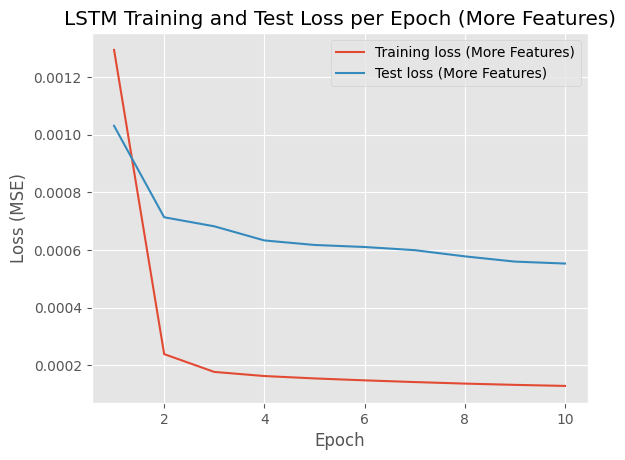

In [18]:
train_losses_lstm_more = []
test_losses_lstm_more = []

model_lstm_more = LSTMModel(input_size=len(chosen_features_more), hidden_size=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lstm_more.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_lstm_more.train()
    for batch_x, batch_y in train_loader_more:
        optimizer.zero_grad()
        outputs = model_lstm_more(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader_more)
    train_losses_lstm_more.append(avg_loss)
    print(f"LSTM More Features Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_lstm_more.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader_more:
            outputs = model_lstm_more(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader_more)
    test_losses_lstm_more.append(avg_test_loss)
    print(f"LSTM More Features Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses_lstm_more, label="Training loss (More Features)")
plt.plot(x, test_losses_lstm_more, label="Test loss (More Features)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("LSTM Training and Test Loss per Epoch (More Features)")
plt.show()

### GRU with more features

GRU More Features Epoch 1/10, Training Loss: 0.0008
GRU More Features Epoch 1/10, Test Loss: 0.0014
GRU More Features Epoch 2/10, Training Loss: 0.0003
GRU More Features Epoch 2/10, Test Loss: 0.0008
GRU More Features Epoch 3/10, Training Loss: 0.0002
GRU More Features Epoch 3/10, Test Loss: 0.0007
GRU More Features Epoch 4/10, Training Loss: 0.0002
GRU More Features Epoch 4/10, Test Loss: 0.0006
GRU More Features Epoch 5/10, Training Loss: 0.0001
GRU More Features Epoch 5/10, Test Loss: 0.0006
GRU More Features Epoch 6/10, Training Loss: 0.0001
GRU More Features Epoch 6/10, Test Loss: 0.0006
GRU More Features Epoch 7/10, Training Loss: 0.0001
GRU More Features Epoch 7/10, Test Loss: 0.0006
GRU More Features Epoch 8/10, Training Loss: 0.0001
GRU More Features Epoch 8/10, Test Loss: 0.0005
GRU More Features Epoch 9/10, Training Loss: 0.0001
GRU More Features Epoch 9/10, Test Loss: 0.0005
GRU More Features Epoch 10/10, Training Loss: 0.0001
GRU More Features Epoch 10/10, Test Loss: 0.000

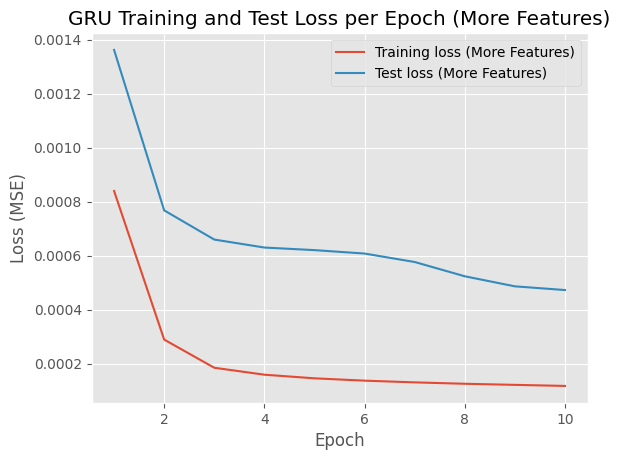

In [19]:

train_losses_gru_more = []
test_losses_gru_more = []

model_gru_more = GRUModel(input_size=len(chosen_features_more), hidden_size=64, num_layers=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_gru_more.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_gru_more.train()
    for batch_x, batch_y in train_loader_more:
        optimizer.zero_grad()
        outputs = model_gru_more(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader_more)
    train_losses_gru_more.append(avg_loss)
    print(f"GRU More Features Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_gru_more.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader_more:
            outputs = model_gru_more(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader_more)
    test_losses_gru_more.append(avg_test_loss)
    print(f"GRU More Features Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses_gru_more, label="Training loss (More Features)")
plt.plot(x, test_losses_gru_more, label="Test loss (More Features)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("GRU Training and Test Loss per Epoch (More Features)")
plt.show()

### CNN with more features

CNN More Features Epoch 1/10, Training Loss: 0.0011
CNN More Features Epoch 1/10, Test Loss: 0.0016
CNN More Features Epoch 2/10, Training Loss: 0.0003
CNN More Features Epoch 2/10, Test Loss: 0.0008
CNN More Features Epoch 3/10, Training Loss: 0.0002
CNN More Features Epoch 3/10, Test Loss: 0.0008
CNN More Features Epoch 4/10, Training Loss: 0.0002
CNN More Features Epoch 4/10, Test Loss: 0.0007
CNN More Features Epoch 5/10, Training Loss: 0.0002
CNN More Features Epoch 5/10, Test Loss: 0.0007
CNN More Features Epoch 6/10, Training Loss: 0.0002
CNN More Features Epoch 6/10, Test Loss: 0.0006
CNN More Features Epoch 7/10, Training Loss: 0.0002
CNN More Features Epoch 7/10, Test Loss: 0.0006
CNN More Features Epoch 8/10, Training Loss: 0.0002
CNN More Features Epoch 8/10, Test Loss: 0.0006
CNN More Features Epoch 9/10, Training Loss: 0.0002
CNN More Features Epoch 9/10, Test Loss: 0.0006
CNN More Features Epoch 10/10, Training Loss: 0.0002
CNN More Features Epoch 10/10, Test Loss: 0.000

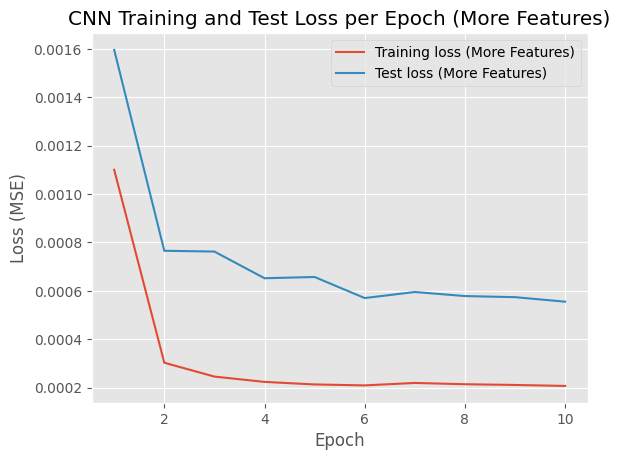

In [20]:

train_losses_cnn_more = []
test_losses_cnn_more = []

model_cnn_more = CNNModel(input_size=len(chosen_features_more), hidden_size=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_cnn_more.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_cnn_more.train()
    for batch_x, batch_y in train_loader_more:
        optimizer.zero_grad()
        outputs = model_cnn_more(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader_more)
    train_losses_cnn_more.append(avg_loss)
    print(f"CNN More Features Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_cnn_more.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader_more:
            outputs = model_cnn_more(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader_more)
    test_losses_cnn_more.append(avg_test_loss)
    print(f"CNN More Features Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses_cnn_more, label="Training loss (More Features)")
plt.plot(x, test_losses_cnn_more, label="Test loss (More Features)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("CNN Training and Test Loss per Epoch (More Features)")
plt.show()

### Prepare data with fewer features

In [21]:

chosen_features_less = ['temperature'] # Only temperature

features_less = weather_data[chosen_features_less]
features_less.index = weather_data['time']

scaler_less = MinMaxScaler()
features_scaled_less = scaler_less.fit_transform(features_less)
features_scaled_less = pd.DataFrame(features_scaled_less, columns=chosen_features_less, index=features_less.index)

# Create sequences for training and testing with fewer features
# Need to adjust the create_sequences function or create a new one that only predicts temperature
def create_sequences_single_feature(data, sequence_length, target_feature_index):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)]
        y = data[i + sequence_length, target_feature_index] # Assuming temperature is the target
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

x_train_less, y_train_less = create_sequences_single_feature(features_scaled_less.values[:train_end], sequence_length, chosen_features_less.index('temperature'))
x_test_less, y_test_less = create_sequences_single_feature(features_scaled_less.values[train_end - sequence_length:], sequence_length, chosen_features_less.index('temperature'))


train_dataset_less = torch.utils.data.TensorDataset(x_train_less, y_train_less)
test_dataset_less = torch.utils.data.TensorDataset(x_test_less, y_test_less)
train_loader_less = torch.utils.data.DataLoader(train_dataset_less, batch_size=32, shuffle=False)
test_loader_less = torch.utils.data.DataLoader(test_dataset_less, batch_size=32, shuffle=False)

print(f"Shape of x_train_less: {x_train_less.shape}")
print(f"Shape of y_train_less: {y_train_less.shape}")
print(f"Shape of x_test_less: {x_test_less.shape}")
print(f"Shape of y_test_less: {y_test_less.shape}")

Shape of x_train_less: torch.Size([269960, 16, 1])
Shape of y_train_less: torch.Size([269960])
Shape of x_test_less: torch.Size([115704, 16, 1])
Shape of y_test_less: torch.Size([115704])


### LSTM with fewer features

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


LSTM Less Features Epoch 1/10, Training Loss: 0.0014
LSTM Less Features Epoch 1/10, Test Loss: 0.0007
LSTM Less Features Epoch 2/10, Training Loss: 0.0003
LSTM Less Features Epoch 2/10, Test Loss: 0.0007
LSTM Less Features Epoch 3/10, Training Loss: 0.0002
LSTM Less Features Epoch 3/10, Test Loss: 0.0006
LSTM Less Features Epoch 4/10, Training Loss: 0.0002
LSTM Less Features Epoch 4/10, Test Loss: 0.0006
LSTM Less Features Epoch 5/10, Training Loss: 0.0002
LSTM Less Features Epoch 5/10, Test Loss: 0.0006
LSTM Less Features Epoch 6/10, Training Loss: 0.0002
LSTM Less Features Epoch 6/10, Test Loss: 0.0005
LSTM Less Features Epoch 7/10, Training Loss: 0.0002
LSTM Less Features Epoch 7/10, Test Loss: 0.0005
LSTM Less Features Epoch 8/10, Training Loss: 0.0002
LSTM Less Features Epoch 8/10, Test Loss: 0.0005
LSTM Less Features Epoch 9/10, Training Loss: 0.0002
LSTM Less Features Epoch 9/10, Test Loss: 0.0005
LSTM Less Features Epoch 10/10, Training Loss: 0.0002
LSTM Less Features Epoch 10/

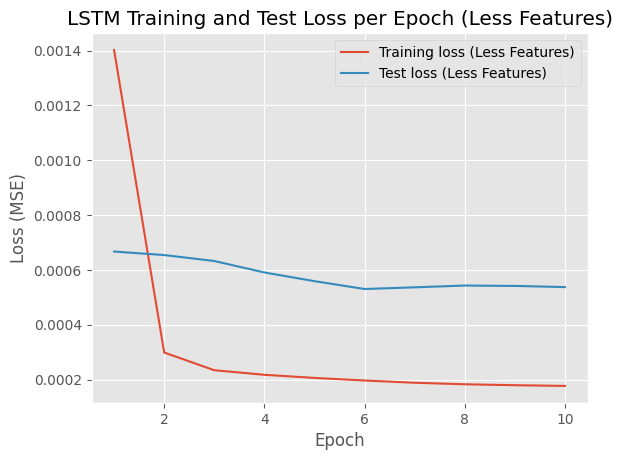

In [22]:
train_losses_lstm_less = []
test_losses_lstm_less = []

model_lstm_less = LSTMModel(input_size=len(chosen_features_less), hidden_size=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lstm_less.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_lstm_less.train()
    for batch_x, batch_y in train_loader_less:
        optimizer.zero_grad()
        outputs = model_lstm_less(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader_less)
    train_losses_lstm_less.append(avg_loss)
    print(f"LSTM Less Features Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_lstm_less.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader_less:
            outputs = model_lstm_less(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader_less)
    test_losses_lstm_less.append(avg_test_loss)
    print(f"LSTM Less Features Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses_lstm_less, label="Training loss (Less Features)")
plt.plot(x, test_losses_lstm_less, label="Test loss (Less Features)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("LSTM Training and Test Loss per Epoch (Less Features)")
plt.show()

### GRU with fewer features

GRU Less Features Epoch 1/10, Training Loss: 0.0012
GRU Less Features Epoch 1/10, Test Loss: 0.0008
GRU Less Features Epoch 2/10, Training Loss: 0.0003
GRU Less Features Epoch 2/10, Test Loss: 0.0006
GRU Less Features Epoch 3/10, Training Loss: 0.0002
GRU Less Features Epoch 3/10, Test Loss: 0.0005
GRU Less Features Epoch 4/10, Training Loss: 0.0002
GRU Less Features Epoch 4/10, Test Loss: 0.0005
GRU Less Features Epoch 5/10, Training Loss: 0.0002
GRU Less Features Epoch 5/10, Test Loss: 0.0005
GRU Less Features Epoch 6/10, Training Loss: 0.0002
GRU Less Features Epoch 6/10, Test Loss: 0.0005
GRU Less Features Epoch 7/10, Training Loss: 0.0002
GRU Less Features Epoch 7/10, Test Loss: 0.0004
GRU Less Features Epoch 8/10, Training Loss: 0.0002
GRU Less Features Epoch 8/10, Test Loss: 0.0005
GRU Less Features Epoch 9/10, Training Loss: 0.0002
GRU Less Features Epoch 9/10, Test Loss: 0.0005
GRU Less Features Epoch 10/10, Training Loss: 0.0002
GRU Less Features Epoch 10/10, Test Loss: 0.000

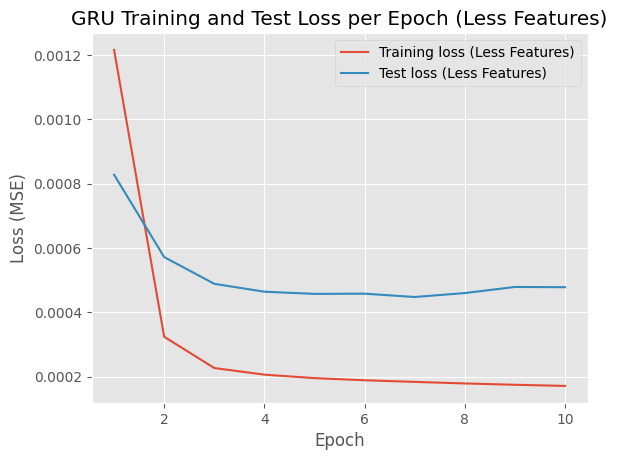

In [23]:
train_losses_gru_less = []
test_losses_gru_less = []

model_gru_less = GRUModel(input_size=len(chosen_features_less), hidden_size=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_gru_less.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_gru_less.train()
    for batch_x, batch_y in train_loader_less:
        optimizer.zero_grad()
        outputs = model_gru_less(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader_less)
    train_losses_gru_less.append(avg_loss)
    print(f"GRU Less Features Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_gru_less.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader_less:
            outputs = model_gru_less(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader_less)
    test_losses_gru_less.append(avg_test_loss)
    print(f"GRU Less Features Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses_gru_less, label="Training loss (Less Features)")
plt.plot(x, test_losses_gru_less, label="Test loss (Less Features)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("GRU Training and Test Loss per Epoch (Less Features)")
plt.show()

### CNN with fewer features

CNN Less Features Epoch 1/10, Training Loss: 0.0011
CNN Less Features Epoch 1/10, Test Loss: 0.0006
CNN Less Features Epoch 2/10, Training Loss: 0.0003
CNN Less Features Epoch 2/10, Test Loss: 0.0006
CNN Less Features Epoch 3/10, Training Loss: 0.0003
CNN Less Features Epoch 3/10, Test Loss: 0.0006
CNN Less Features Epoch 4/10, Training Loss: 0.0002
CNN Less Features Epoch 4/10, Test Loss: 0.0005
CNN Less Features Epoch 5/10, Training Loss: 0.0002
CNN Less Features Epoch 5/10, Test Loss: 0.0005
CNN Less Features Epoch 6/10, Training Loss: 0.0002
CNN Less Features Epoch 6/10, Test Loss: 0.0005
CNN Less Features Epoch 7/10, Training Loss: 0.0002
CNN Less Features Epoch 7/10, Test Loss: 0.0005
CNN Less Features Epoch 8/10, Training Loss: 0.0002
CNN Less Features Epoch 8/10, Test Loss: 0.0005
CNN Less Features Epoch 9/10, Training Loss: 0.0002
CNN Less Features Epoch 9/10, Test Loss: 0.0005
CNN Less Features Epoch 10/10, Training Loss: 0.0002
CNN Less Features Epoch 10/10, Test Loss: 0.000

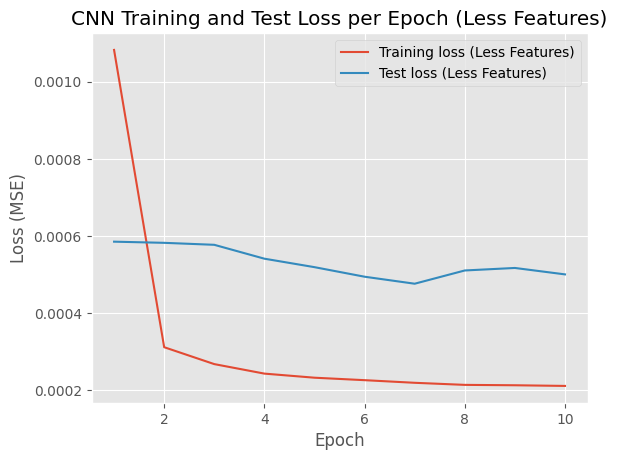

In [24]:

train_losses_cnn_less = []
test_losses_cnn_less = []

model_cnn_less = CNNModel(input_size=len(chosen_features_less), hidden_size=64)
criterion = nn.MSELoss()
optimizer = optim.Adam(model_cnn_less.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_cnn_less.train()
    for batch_x, batch_y in train_loader_less:
        optimizer.zero_grad()
        outputs = model_cnn_less(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader_less)
    train_losses_cnn_less.append(avg_loss)
    print(f"CNN Less Features Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")

    model_cnn_less.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader_less:
            outputs = model_cnn_less(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader_less)
    test_losses_cnn_less.append(avg_test_loss)
    print(f"CNN Less Features Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")

x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses_cnn_less, label="Training loss (Less Features)")
plt.plot(x, test_losses_cnn_less, label="Test loss (Less Features)")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("CNN Training and Test Loss per Epoch (Less Features)")
plt.show()

## Prediction results for Ablation Study 1: Data Augmentation

<ipython-input-25-f2ea4ece5729>:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')


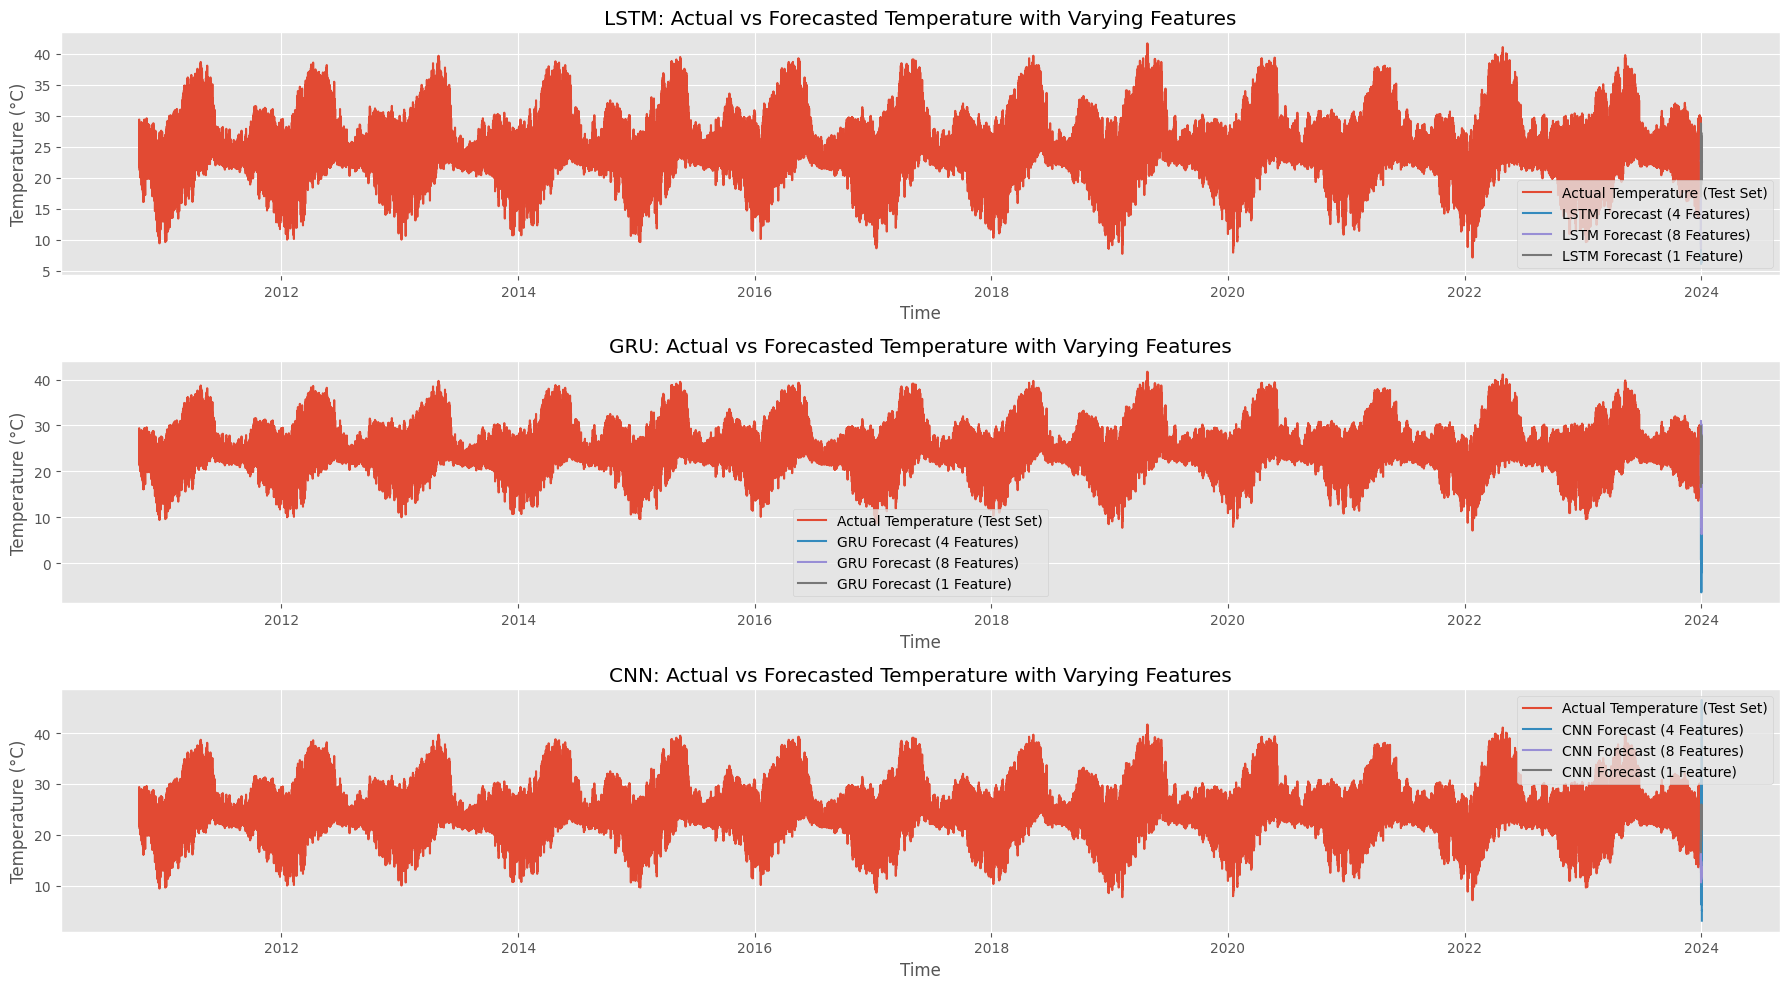


--- Performance Comparison (MSE) over the first 72 steps of the test set ---
LSTM Baseline (4 Features) MSE: 283.5546
GRU Baseline (4 Features) MSE: 261.1630
CNN Baseline (4 Features) MSE: 174.4350
LSTM More Features (8 Features) MSE: 11.3629
GRU More Features (8 Features) MSE: 46.2665
CNN More Features (8 Features) MSE: 128.0951
LSTM Less Features (1 Feature) MSE: 4.2245
GRU Less Features (1 Feature) MSE: 8.0501
CNN Less Features (1 Feature) MSE: 6.4455


In [25]:
# Compare baseline predictions with predictions from models trained with more and fewer features.
# Function to make forecasts with a given model and scaler
def forecast_temperature(model, scaler, features_scaled_data, chosen_features_list, sequence_length, future_steps=72):
    last_sequence_scaled = features_scaled_data.values[-sequence_length:]
    last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)
    model.eval()
    forecasted_values_scaled = []
    current_sequence = last_sequence_tensor

    with torch.no_grad():
        for _ in range(future_steps):
            next_step_prediction_scaled = model(current_sequence)
            forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
            # Create a dummy array for inverse transformation
            dummy_array_step = np.zeros((1, len(chosen_features_list)))
            # Place the scaled prediction in the correct column for temperature
            dummy_array_step[0, chosen_features_list.index('temperature')] = next_step_prediction_scaled.squeeze().item()
            # Pad the new prediction to match the number of features in the sequence
            new_step_tensor_padded = torch.tensor(dummy_array_step, dtype=torch.float32).unsqueeze(1) # Shape (1, 1, num_features)
            current_sequence = torch.cat((current_sequence[:, 1:, :], new_step_tensor_padded), dim=1)

    # Inverse transform the forecasted scaled temperature values
    dummy_array_forecast = np.zeros((future_steps, len(chosen_features_list)))
    dummy_array_forecast[:, chosen_features_list.index('temperature')] = forecasted_values_scaled
    forecasted_values_original_scale = scaler.inverse_transform(dummy_array_forecast)[:, chosen_features_list.index('temperature')]

    return forecasted_values_original_scale

# Get the actual test data for comparison
actual_test_time = weather_data['time'].values[train_end:]
actual_test_temp = weather_data['temperature'].values[train_end:]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')


# Forecast for Baseline (4 features)
forecast_lstm_baseline = forecast_temperature(model_lstm, scaler, features_scaled, chosen_features, sequence_length)
forecast_gru_baseline = forecast_temperature(model_gru, scaler, features_scaled, chosen_features, sequence_length)
forecast_cnn_baseline = forecast_temperature(model_cnn, scaler, features_scaled, chosen_features, sequence_length)

# Forecast for More Features (8 features)
forecast_lstm_more = forecast_temperature(model_lstm_more, scaler_more, features_scaled_more, chosen_features_more, sequence_length)
forecast_gru_more = forecast_temperature(model_gru_more, scaler_more, features_scaled_more, chosen_features_more, sequence_length)
forecast_cnn_more = forecast_temperature(model_cnn_more, scaler_more, features_scaled_more, chosen_features_more, sequence_length)

# Forecast for Less Features (1 feature)
# Need a dedicated forecasting function for the less feature case as scaler has different shape
def forecast_temperature_less_features(model, scaler, features_scaled_data, chosen_features_list, sequence_length, future_steps=72):
    last_sequence_scaled = features_scaled_data.values[-sequence_length:]
    last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)
    model.eval()
    forecasted_values_scaled = []
    current_sequence = last_sequence_tensor

    with torch.no_grad():
        for _ in range(future_steps):
            next_step_prediction_scaled = model(current_sequence)
            forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
            # Since there's only one feature, the predicted value is the new sequence step
            # Remove the extra unsqueeze(2)
            new_step_tensor = next_step_prediction_scaled.unsqueeze(1) # Shape (1, 1, 1)
            current_sequence = torch.cat((current_sequence[:, 1:, :], new_step_tensor), dim=1)

    # Inverse transform the forecasted scaled temperature values
    # The scaler_less expects an array of shape (n_samples, 1)
    forecasted_values_scaled_reshaped = np.array(forecasted_values_scaled).reshape(-1, 1)
    forecasted_values_original_scale = scaler_less.inverse_transform(forecasted_values_scaled_reshaped)[:, 0]

    return forecasted_values_original_scale

    # Inverse transform the forecasted scaled temperature values
    # The scaler_less expects an array of shape (n_samples, 1)
    forecasted_values_scaled_reshaped = np.array(forecasted_values_scaled).reshape(-1, 1)
    forecasted_values_original_scale = scaler_less.inverse_transform(forecasted_values_scaled_reshaped)[:, 0]

    return forecasted_values_original_scale

forecast_lstm_less = forecast_temperature_less_features(model_lstm_less, scaler_less, features_scaled_less, chosen_features_less, sequence_length)
forecast_gru_less = forecast_temperature_less_features(model_gru_less, scaler_less, features_scaled_less, chosen_features_less, sequence_length)
forecast_cnn_less = forecast_temperature_less_features(model_cnn_less, scaler_less, features_scaled_less, chosen_features_less, sequence_length)


# Plotting the results
plt.figure(figsize=(18, 10))

# Plot LSTM forecasts
plt.subplot(3, 1, 1)
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecast_lstm_baseline, label='LSTM Forecast (4 Features)')
plt.plot(future_time_stamps, forecast_lstm_more, label='LSTM Forecast (8 Features)')
plt.plot(future_time_stamps, forecast_lstm_less, label='LSTM Forecast (1 Feature)')
plt.title('LSTM: Actual vs Forecasted Temperature with Varying Features')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot GRU forecasts
plt.subplot(3, 1, 2)
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecast_gru_baseline, label='GRU Forecast (4 Features)')
plt.plot(future_time_stamps, forecast_gru_more, label='GRU Forecast (8 Features)')
plt.plot(future_time_stamps, forecast_gru_less, label='GRU Forecast (1 Feature)')
plt.title('GRU: Actual vs Forecasted Temperature with Varying Features')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot CNN forecasts
plt.subplot(3, 1, 3)
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecast_cnn_baseline, label='CNN Forecast (4 Features)')
plt.plot(future_time_stamps, forecast_cnn_more, label='CNN Forecast (8 Features)')
plt.plot(future_time_stamps, forecast_cnn_less, label='CNN Forecast (1 Feature)')
plt.title('CNN: Actual vs Forecasted Temperature with Varying Features')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Check if the test set is long enough to compare 72 future steps
if len(actual_test_temp) >= 72:
    actual_future_temp = actual_test_temp[:72] # Compare with the first 72 points of the test set
    print("\n--- Performance Comparison (MSE) over the first 72 steps of the test set ---")

    mse_lstm_baseline = mean_squared_error(actual_future_temp, forecast_lstm_baseline)
    mse_gru_baseline = mean_squared_error(actual_future_temp, forecast_gru_baseline)
    mse_cnn_baseline = mean_squared_error(actual_future_temp, forecast_cnn_baseline)

    mse_lstm_more = mean_squared_error(actual_future_temp, forecast_lstm_more)
    mse_gru_more = mean_squared_error(actual_future_temp, forecast_gru_more)
    mse_cnn_more = mean_squared_error(actual_future_temp, forecast_cnn_more)

    mse_lstm_less = mean_squared_error(actual_future_temp, forecast_lstm_less)
    mse_gru_less = mean_squared_error(actual_future_temp, forecast_gru_less)
    mse_cnn_less = mean_squared_error(actual_future_temp, forecast_cnn_less)

    print(f"LSTM Baseline (4 Features) MSE: {mse_lstm_baseline:.4f}")
    print(f"GRU Baseline (4 Features) MSE: {mse_gru_baseline:.4f}")
    print(f"CNN Baseline (4 Features) MSE: {mse_cnn_baseline:.4f}")

    print(f"LSTM More Features (8 Features) MSE: {mse_lstm_more:.4f}")
    print(f"GRU More Features (8 Features) MSE: {mse_gru_more:.4f}")
    print(f"CNN More Features (8 Features) MSE: {mse_cnn_more:.4f}")

    print(f"LSTM Less Features (1 Feature) MSE: {mse_lstm_less:.4f}")
    print(f"GRU Less Features (1 Feature) MSE: {mse_gru_less:.4f}")
    print(f"CNN Less Features (1 Feature) MSE: {mse_cnn_less:.4f}")

else:
    print("\nWarning: Test set is not long enough (at least 72 steps) to compare the 72-step forecast with actual data.")
    print("Cannot calculate performance metrics over the forecast window.")

# Ablation study 2: Model modification
For the second ablation study, the models will have their architecure modified through the addition of extra layers and bidirectionality (for LSTM and GRU)

In [26]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.2, bidirectional=False):
        super(LSTMModel, self).__init__()
        # Allow bidirectional to be an option
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        # Adjust linear layer input size based on bidirectionality
        self.linear = nn.Linear(hidden_size * (2 if bidirectional else 1), 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        # The output for the last time step is taken
        out = self.linear(out[:, -1, :])
        return out


class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0, bidirectional=False):
        super(GRUModel, self).__init__()
        # Allow bidirectional to be an option
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        # Adjust linear layer input size based on bidirectionality
        self.linear = nn.Linear(hidden_size * (2 if bidirectional else 1), 1)

    def forward(self, x):
        out, _ = self.gru(x)
        # The output for the last time step is taken
        out = self.linear(out[:, -1, :])
        return out

class CNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0):
        super(CNNModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(input_size, hidden_size, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(p=dropout), # Using the passed dropout value
            nn.Conv1d(hidden_size, hidden_size, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Dropout(p=dropout) # Using the passed dropout value
        )
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.flatten = nn.Flatten()

        # Placeholder for linear layer - we'll initialize it after calculating the size
        self.linear = None
        self._flattened_size = None # Store flattened size

    def _get_flattened_size(self, input_shape):
        # Create a dummy tensor with the given input shape
        dummy_input = torch.zeros(1, input_shape[0], input_shape[1]) # (batch_size=1, input_size, sequence_length)
        dummy_input = dummy_input.permute(0, 2, 1) # Permute to (batch_size, sequence_length, input_size) for LSTM/GRU convention
        # Permute back for Conv1d
        dummy_input = dummy_input.permute(0, 2, 1) # (batch_size, input_size, sequence_length)
        with torch.no_grad():
            out = self.conv(dummy_input)
            out = self.pool(out)
            flattened_size = out.numel() // out.shape[0] # Calculate size per sample

        return flattened_size

    def forward(self, x):
        # Permute input for Conv1d (batch_size, sequence_length, input_size) -> (batch_size, input_size, sequence_length)
        x = x.permute(0, 2, 1)
        out = self.conv(x)
        out = self.pool(out)

        # Calculate flattened size the first time forward is called
        if self._flattened_size is None:
            self._flattened_size = out.numel() // out.shape[0]
            # Initialize the linear layer here
            self.linear = nn.Linear(self._flattened_size, 1)

        out = self.flatten(out)

        # Ensure linear layer is initialized before using it
        if self.linear is None:
             raise RuntimeError("Linear layer not initialized. Call forward with a dummy batch first.")

        out = self.linear(out)
        return out


model_lstm = LSTMModel(input_size=len(chosen_features), hidden_size=64, num_layers=2, bidirectional=True)
model_gru = GRUModel(input_size=len(chosen_features), hidden_size=64, num_layers=2, bidirectional=True)
model_cnn = CNNModel(input_size=len(chosen_features), hidden_size=64)

### LSTM

--- Training LSTM ---
Epoch 1/10, Training Loss: 0.0013
Epoch 1/10, Test Loss: 0.0009
Epoch 2/10, Training Loss: 0.0004
Epoch 2/10, Test Loss: 0.0006
Epoch 3/10, Training Loss: 0.0003
Epoch 3/10, Test Loss: 0.0005
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0005
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0004
Epoch 8/10, Training Loss: 0.0002
Epoch 8/10, Test Loss: 0.0004
Epoch 9/10, Training Loss: 0.0002
Epoch 9/10, Test Loss: 0.0004
Epoch 10/10, Training Loss: 0.0002
Epoch 10/10, Test Loss: 0.0004


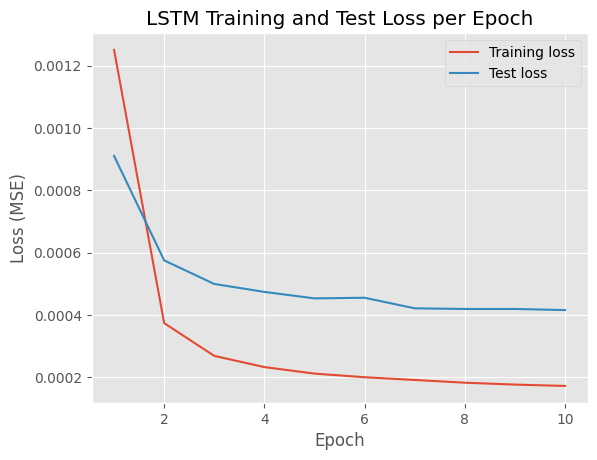

In [27]:

print("--- Training LSTM ---")
train_losses = []
test_losses = []
criterion = nn.MSELoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_lstm.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_lstm(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")
    model_lstm.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model_lstm(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")
x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("LSTM Training and Test Loss per Epoch")
plt.show()

### GRU

--- Training GRU ---
Epoch 1/10, Training Loss: 0.0009
Epoch 1/10, Test Loss: 0.0009
Epoch 2/10, Training Loss: 0.0003
Epoch 2/10, Test Loss: 0.0005
Epoch 3/10, Training Loss: 0.0002
Epoch 3/10, Test Loss: 0.0005
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0005
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0005
Epoch 8/10, Training Loss: 0.0001
Epoch 8/10, Test Loss: 0.0005
Epoch 9/10, Training Loss: 0.0001
Epoch 9/10, Test Loss: 0.0005
Epoch 10/10, Training Loss: 0.0001
Epoch 10/10, Test Loss: 0.0005


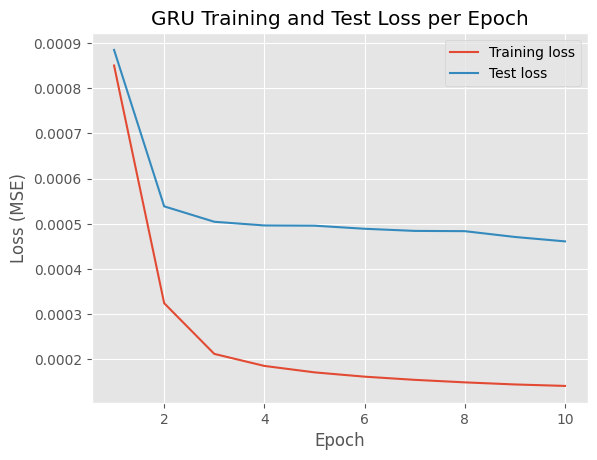

In [28]:
print("--- Training GRU ---")
train_losses = []
test_losses = []
criterion = nn.MSELoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001) # Use model_gru
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_gru.train() # Use model_gru
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_gru(batch_x) # Use model_gru
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")
    model_gru.eval() # Use model_gru
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model_gru(batch_x) # Use model_gru
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")
x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("GRU Training and Test Loss per Epoch")
plt.show()

### CNN

--- Training CNN ---
Epoch 1/10, Training Loss: 0.0009
Epoch 1/10, Test Loss: 0.0006
Epoch 2/10, Training Loss: 0.0002
Epoch 2/10, Test Loss: 0.0006
Epoch 3/10, Training Loss: 0.0002
Epoch 3/10, Test Loss: 0.0005
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0005
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0005
Epoch 8/10, Training Loss: 0.0002
Epoch 8/10, Test Loss: 0.0004
Epoch 9/10, Training Loss: 0.0002
Epoch 9/10, Test Loss: 0.0004
Epoch 10/10, Training Loss: 0.0002
Epoch 10/10, Test Loss: 0.0004


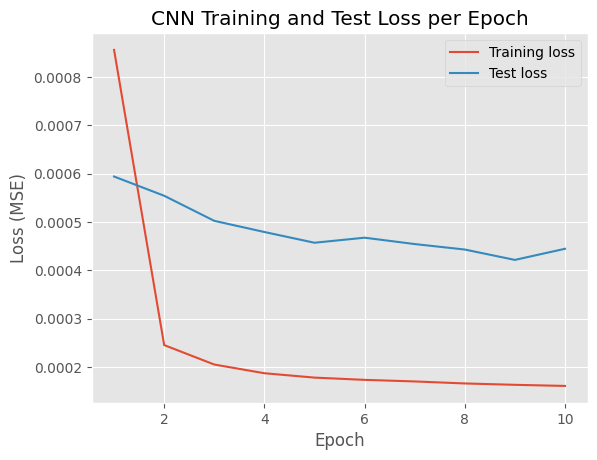

In [29]:
print("--- Training CNN ---")
train_losses = []
test_losses = []
criterion = nn.MSELoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001) # Use model_cnn
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model_cnn.train() # Use model_cnn
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_cnn(batch_x) # Use model_cnn
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")
    model_cnn.eval() # Use model_cnn
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model_cnn(batch_x) # Use model_cnn
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")
x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("CNN Training and Test Loss per Epoch")
plt.show()

### Prediction for enhanced architectures

<ipython-input-32-393ad6c682f2>:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')


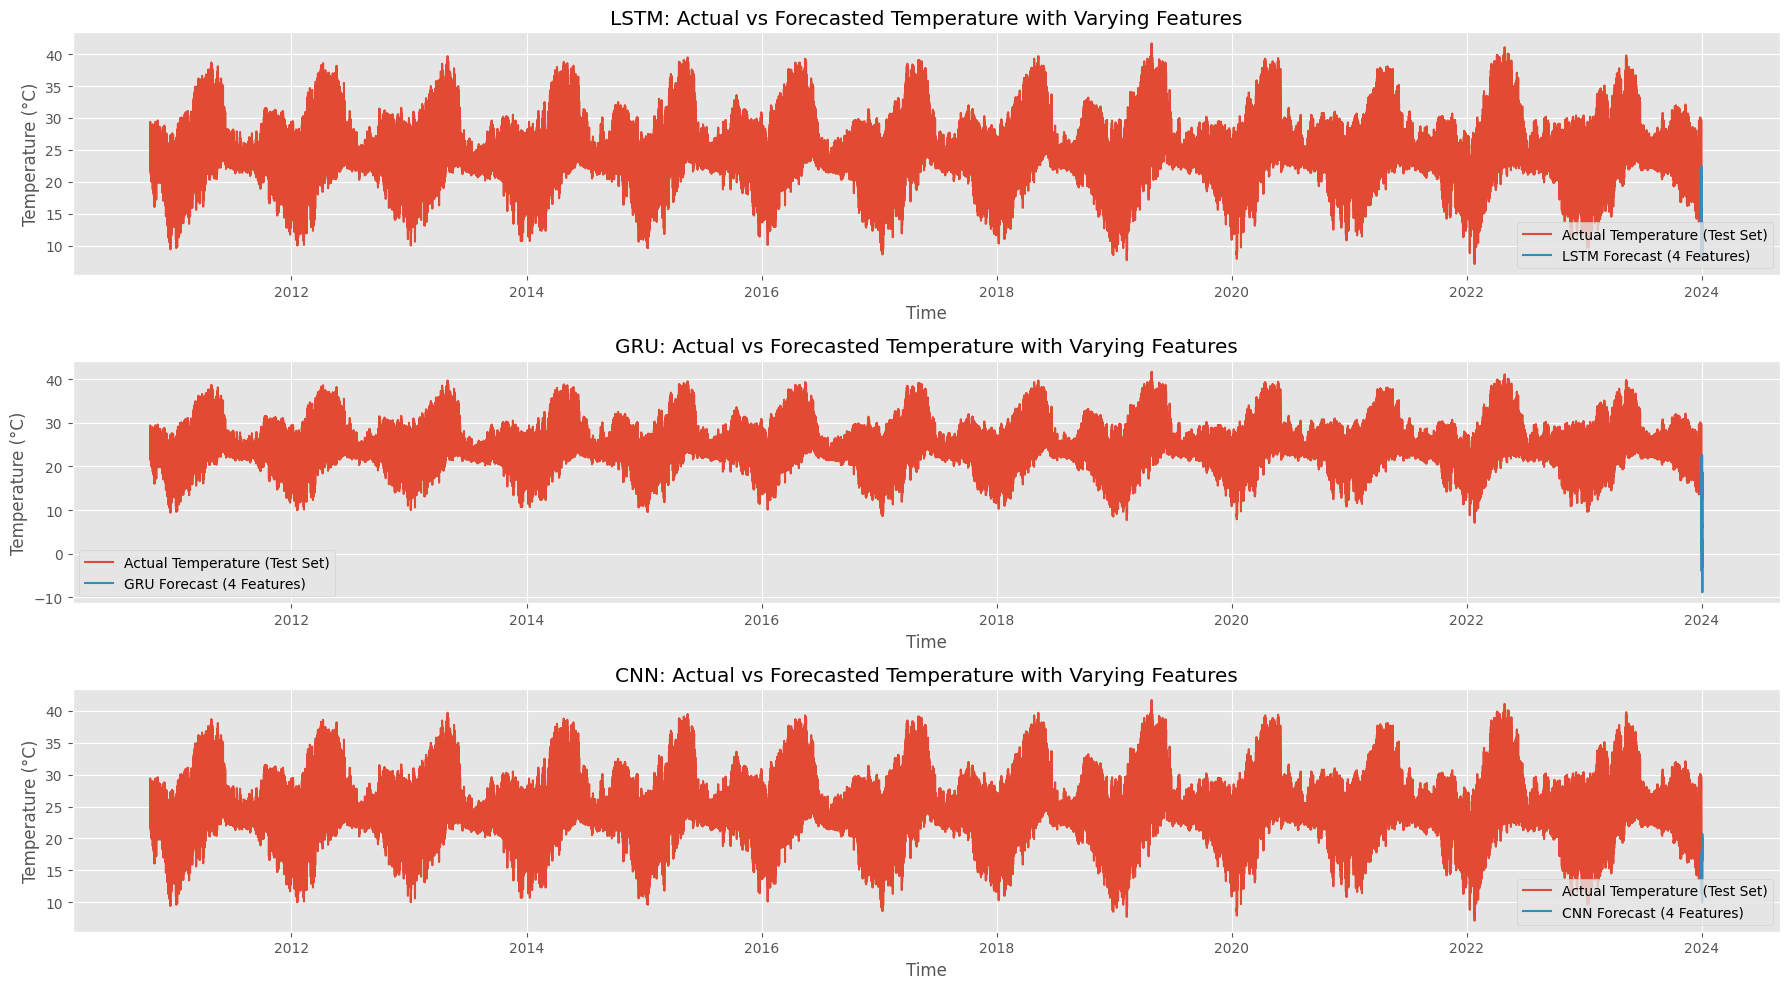


--- Performance Comparison (MSE) over the first 72 steps of the test set ---
LSTM Baseline (4 Features) MSE: 153.2193
GRU Baseline (4 Features) MSE: 234.7527
CNN Baseline (4 Features) MSE: 85.7068


In [32]:
# Compare baseline predictions with predictions from models trained with more and fewer features.
# Function to make forecasts with a given model and scaler
def forecast_temperature(model, scaler, features_scaled_data, chosen_features_list, sequence_length, future_steps=72):
    last_sequence_scaled = features_scaled_data.values[-sequence_length:]
    last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)
    model.eval()
    forecasted_values_scaled = []
    current_sequence = last_sequence_tensor

    with torch.no_grad():
        for _ in range(future_steps):
            next_step_prediction_scaled = model(current_sequence)
            forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
            # Create a dummy array for inverse transformation
            dummy_array_step = np.zeros((1, len(chosen_features_list)))
            # Place the scaled prediction in the correct column for temperature
            dummy_array_step[0, chosen_features_list.index('temperature')] = next_step_prediction_scaled.squeeze().item()
            # Pad the new prediction to match the number of features in the sequence
            new_step_tensor_padded = torch.tensor(dummy_array_step, dtype=torch.float32).unsqueeze(1) # Shape (1, 1, num_features)
            current_sequence = torch.cat((current_sequence[:, 1:, :], new_step_tensor_padded), dim=1)

    # Inverse transform the forecasted scaled temperature values
    dummy_array_forecast = np.zeros((future_steps, len(chosen_features_list)))
    dummy_array_forecast[:, chosen_features_list.index('temperature')] = forecasted_values_scaled
    forecasted_values_original_scale = scaler.inverse_transform(dummy_array_forecast)[:, chosen_features_list.index('temperature')]

    return forecasted_values_original_scale

# Get the actual test data for comparison
actual_test_time = weather_data['time'].values[train_end:]
actual_test_temp = weather_data['temperature'].values[train_end:]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')

# Forecast for Baseline (4 features)
forecast_lstm_baseline = forecast_temperature(model_lstm, scaler, features_scaled, chosen_features, sequence_length)
forecast_gru_baseline = forecast_temperature(model_gru, scaler, features_scaled, chosen_features, sequence_length)
forecast_cnn_baseline = forecast_temperature(model_cnn, scaler, features_scaled, chosen_features, sequence_length)

# Plotting the results
plt.figure(figsize=(18, 10))

# Plot LSTM forecasts
plt.subplot(3, 1, 1)
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecast_lstm_baseline, label='LSTM Forecast (4 Features)')
plt.title('LSTM: Actual vs Forecasted Temperature with Varying Features')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot GRU forecasts
plt.subplot(3, 1, 2)
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecast_gru_baseline, label='GRU Forecast (4 Features)')
plt.title('GRU: Actual vs Forecasted Temperature with Varying Features')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Plot CNN forecasts
plt.subplot(3, 1, 3)
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecast_cnn_baseline, label='CNN Forecast (4 Features)')
plt.title('CNN: Actual vs Forecasted Temperature with Varying Features')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Check if the test set is long enough to compare 72 future steps
if len(actual_test_temp) >= 72:
    actual_future_temp = actual_test_temp[:72] # Compare with the first 72 points of the test set
    print("\n--- Performance Comparison (MSE) over the first 72 steps of the test set ---")

    mse_lstm_baseline = mean_squared_error(actual_future_temp, forecast_lstm_baseline)
    mse_gru_baseline = mean_squared_error(actual_future_temp, forecast_gru_baseline)
    mse_cnn_baseline = mean_squared_error(actual_future_temp, forecast_cnn_baseline)

    print(f"LSTM Baseline (4 Features) MSE: {mse_lstm_baseline:.4f}")
    print(f"GRU Baseline (4 Features) MSE: {mse_gru_baseline:.4f}")
    print(f"CNN Baseline (4 Features) MSE: {mse_cnn_baseline:.4f}")

else:
    print("\nWarning: Test set is not long enough (at least 72 steps) to compare the 72-step forecast with actual data.")
    print("Cannot calculate performance metrics over the forecast window.")

# Ablation study 3: Hybrid architecture
Finally, in this study, the LSTM and CNN architectures are combined together and tested against the former systems.

In [30]:
class CNN_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(CNN_LSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        out = self.cnn(x)
        out = out.permu
        te(0, 2, 1)
        out, _ = self.lstm(out)
        out = self.fc(out[:, -1, :])
        return out

--- Training CNN ---
Epoch 1/10, Training Loss: 0.0014
Epoch 1/10, Test Loss: 0.0008
Epoch 2/10, Training Loss: 0.0003
Epoch 2/10, Test Loss: 0.0005
Epoch 3/10, Training Loss: 0.0002
Epoch 3/10, Test Loss: 0.0005
Epoch 4/10, Training Loss: 0.0002
Epoch 4/10, Test Loss: 0.0005
Epoch 5/10, Training Loss: 0.0002
Epoch 5/10, Test Loss: 0.0005
Epoch 6/10, Training Loss: 0.0002
Epoch 6/10, Test Loss: 0.0005
Epoch 7/10, Training Loss: 0.0002
Epoch 7/10, Test Loss: 0.0005
Epoch 8/10, Training Loss: 0.0002
Epoch 8/10, Test Loss: 0.0004
Epoch 9/10, Training Loss: 0.0002
Epoch 9/10, Test Loss: 0.0004
Epoch 10/10, Training Loss: 0.0002
Epoch 10/10, Test Loss: 0.0004


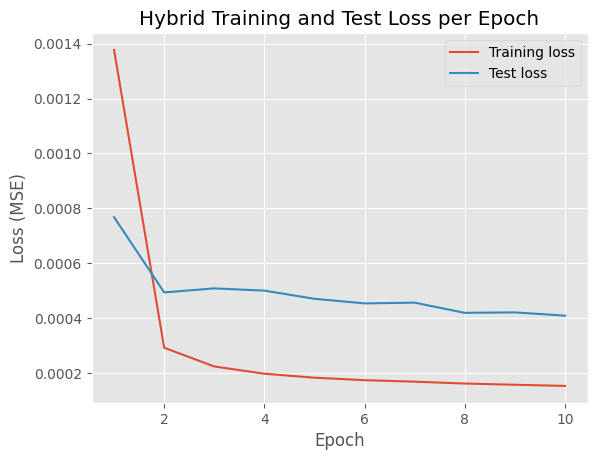

In [33]:
model = CNN_LSTM(input_size=len(chosen_features), hidden_size=64, num_layers=2, num_classes=1)

print("--- Training Hybrid ---")
train_losses = []
test_losses = []
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs.squeeze(), batch_y.squeeze())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_loss = train_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {avg_loss:.4f}")
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            outputs = model(batch_x)
            loss = criterion(outputs.squeeze(), batch_y.squeeze())
            test_loss += loss.item()
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}")
x = np.linspace(1, num_epochs, num_epochs)
plt.plot(x, train_losses, label="Training loss")
plt.plot(x, test_losses, label="Test loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Hybrid Training and Test Loss per Epoch")
plt.show()

<ipython-input-34-f2dc0ff91632>:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')
<ipython-input-34-f2dc0ff91632>:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')


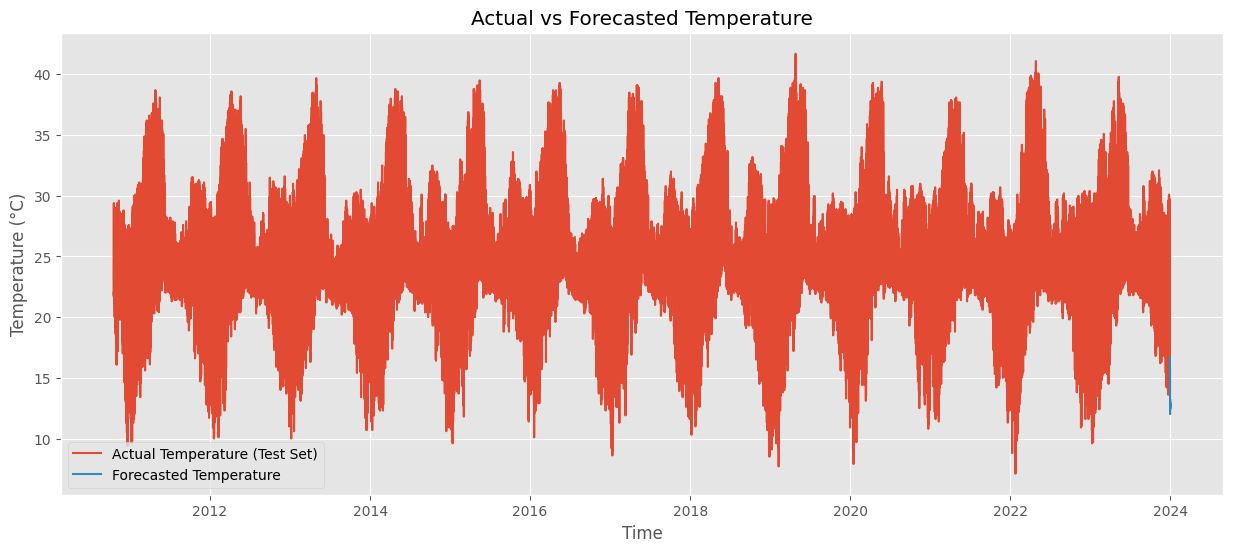

In [34]:
last_sequence_scaled = features_scaled.values[-sequence_length:]

# Convert the last sequence to a PyTorch tensor and add a batch dimension
last_sequence_tensor = torch.tensor(last_sequence_scaled, dtype=torch.float32).unsqueeze(0)

# Set the model to evaluation mode
model.eval()

# Number of future steps to forecast
future_steps = 72 # hours

forecasted_values_scaled = []
current_sequence = last_sequence_tensor

with torch.no_grad():
    for _ in range(future_steps):
        next_step_prediction_scaled = model(current_sequence)
        forecasted_values_scaled.append(next_step_prediction_scaled.squeeze().item())
        new_step_tensor = next_step_prediction_scaled.unsqueeze(1) # Shape (1, 1, 1)
        padded_new_step = torch.zeros(1, 1, len(chosen_features))
        padded_new_step[:, :, chosen_features.index('temperature')] = new_step_tensor
        current_sequence = torch.cat((current_sequence[:, 1:, :], padded_new_step), dim=1)

dummy_array_forecast = np.zeros((future_steps, len(chosen_features)))
dummy_array_forecast[:, chosen_features.index('temperature')] = forecasted_values_scaled
forecasted_values_original_scale = scaler.inverse_transform(dummy_array_forecast)[:, chosen_features.index('temperature')]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=future_steps, freq='H')

# Get the actual test data for comparison
actual_test_time = weather_data['time'].values[train_end:]
actual_test_temp = weather_data['temperature'].values[train_end:]
last_test_time = weather_data['time'].values[-1]
future_time_stamps = pd.date_range(start=last_test_time + pd.Timedelta(hours=1), periods=72, freq='H')

# Plotting the actual test data and the forecasted values
plt.figure(figsize=(15, 6))
plt.plot(actual_test_time, actual_test_temp, label='Actual Temperature (Test Set)')
plt.plot(future_time_stamps, forecasted_values_original_scale, label='Forecasted Temperature')
plt.title('Actual vs Forecasted Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()